In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
Insurance_Fraud_Detection = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [4]:
Insurance_Fraud_Detection

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
Insurance_Fraud_Detection.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
Insurance_Fraud_Detection.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
Insurance_Fraud_Detection.shape

(1000, 40)

In [7]:
Insurance_Fraud_Detection.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

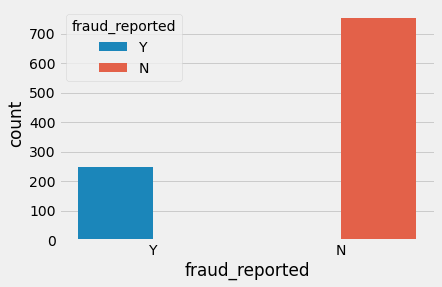

In [8]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=Insurance_Fraud_Detection, hue='fraud_reported')

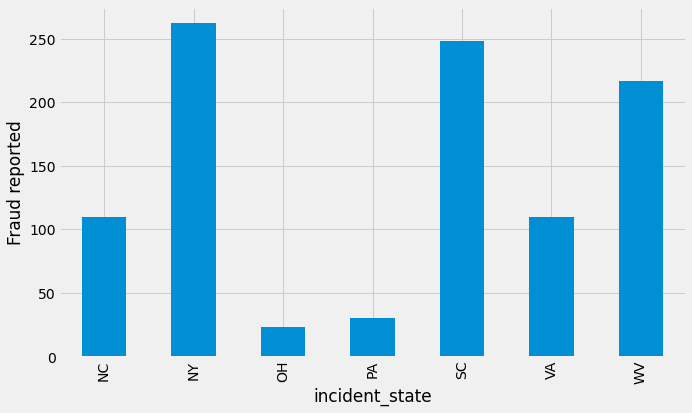

In [9]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Insurance_Fraud_Detection.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

In [10]:
Insurance_Fraud_Detection['fraud_reported'].value_counts() # Count number of frauds vs non-frauds

N    753
Y    247
Name: fraud_reported, dtype: int64

In [11]:
Insurance_Fraud_Detection['incident_state'].value_counts()


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

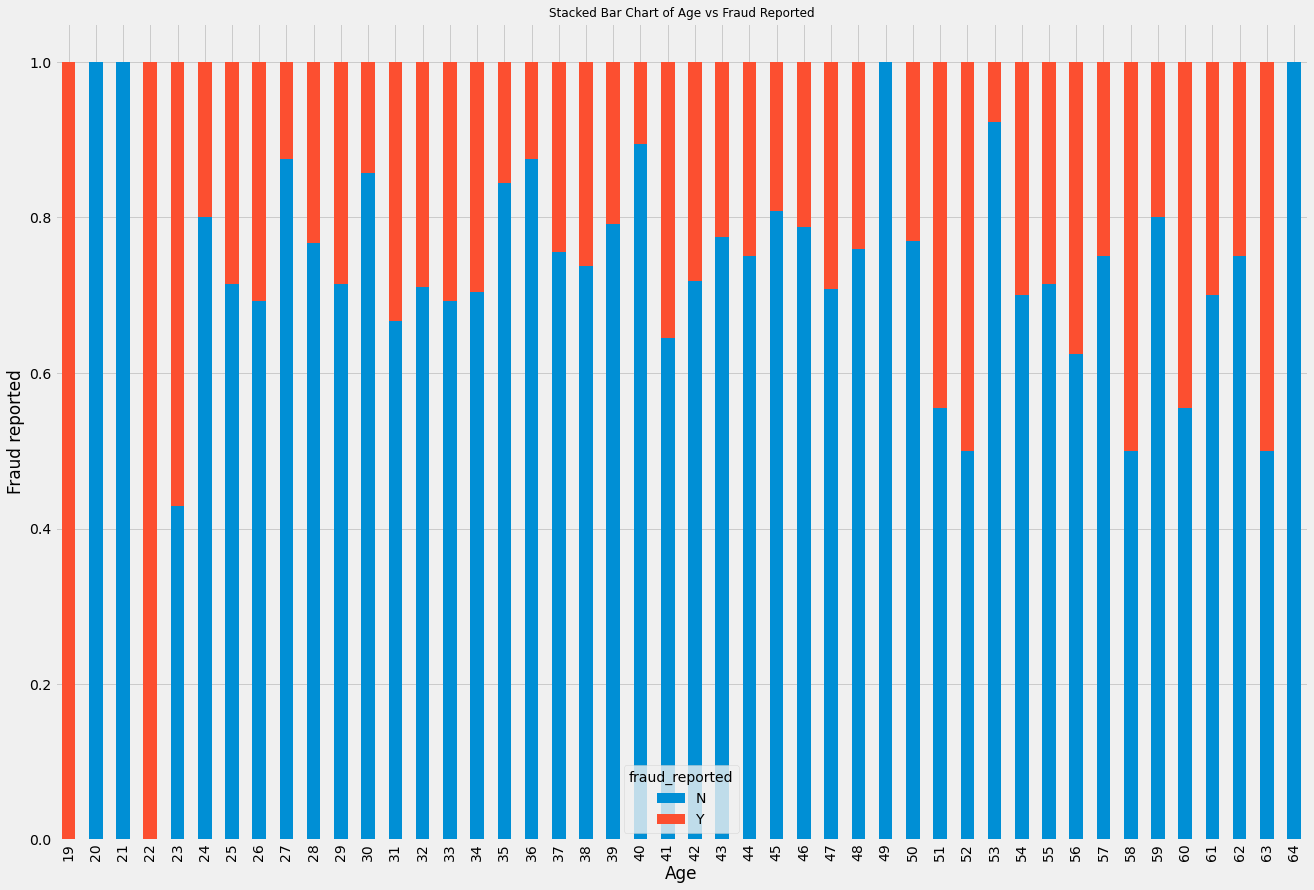

In [13]:
plt.rcParams['figure.figsize'] = [20, 14]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(Insurance_Fraud_Detection.age, Insurance_Fraud_Detection.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

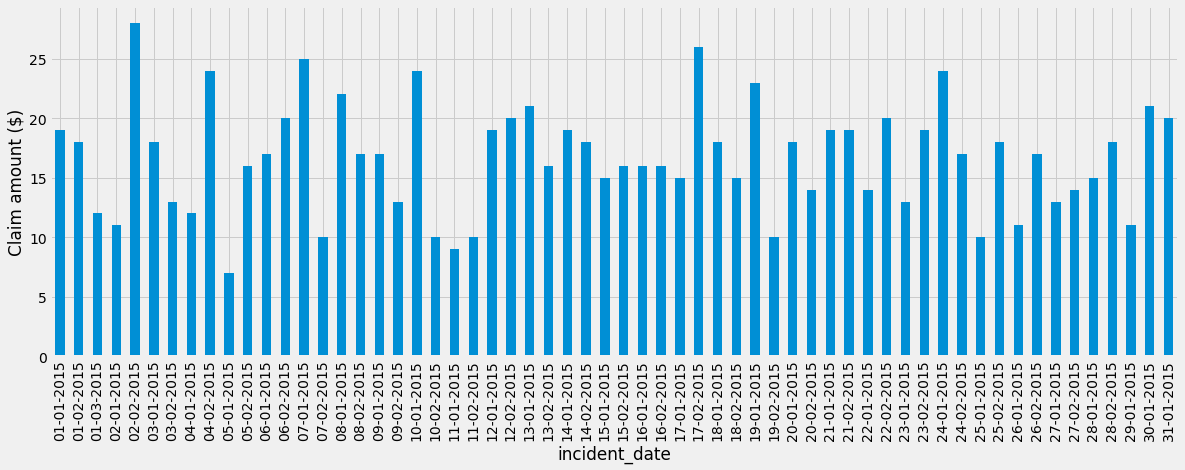

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = Insurance_Fraud_Detection.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

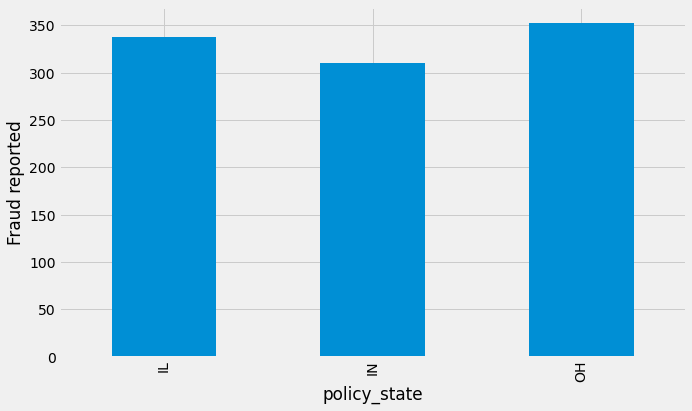

In [16]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Insurance_Fraud_Detection.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

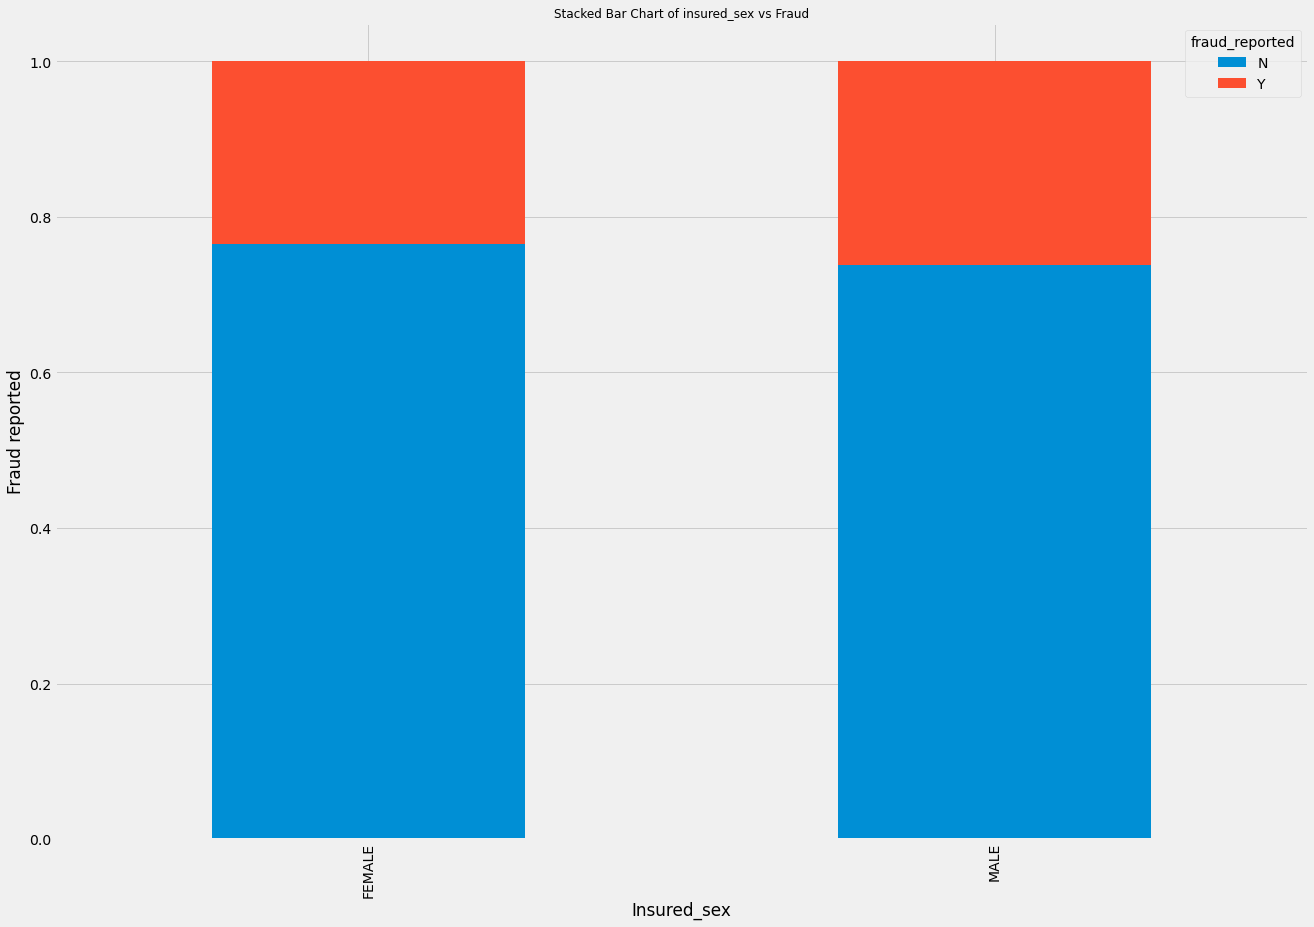

In [18]:
table=pd.crosstab(Insurance_Fraud_Detection.insured_sex, Insurance_Fraud_Detection.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_sex vs Fraud', fontsize=12)
plt.xlabel('Insured_sex')
plt.ylabel('Fraud reported')
plt.show()

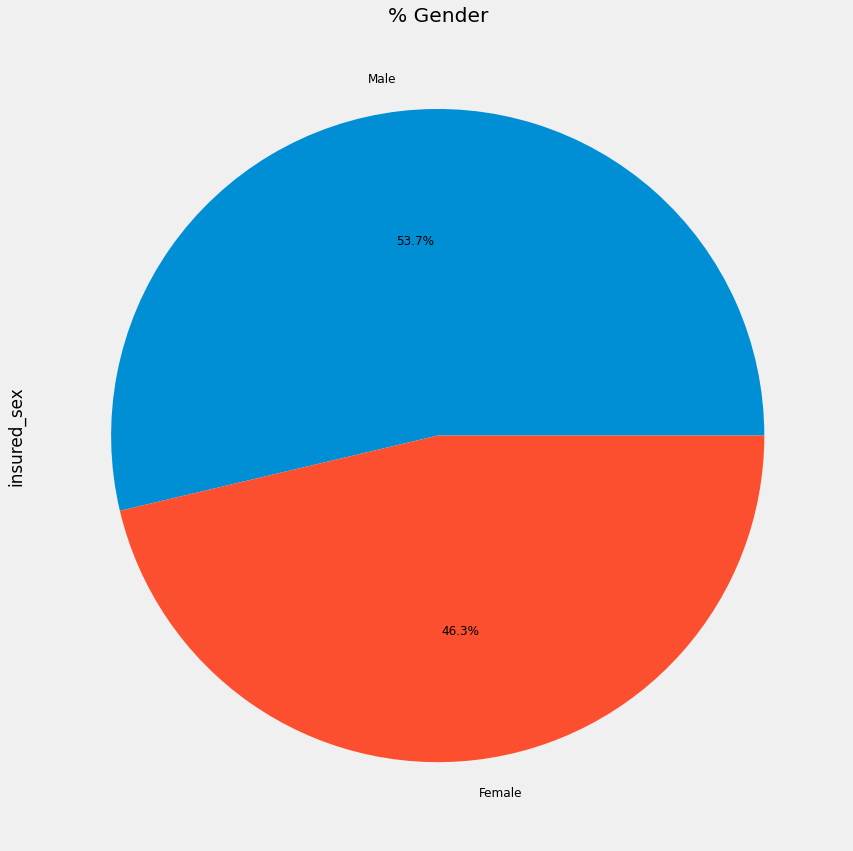

In [21]:
ax = (Insurance_Fraud_Detection['insured_sex'].value_counts()*100.0 /len(Insurance_Fraud_Detection))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

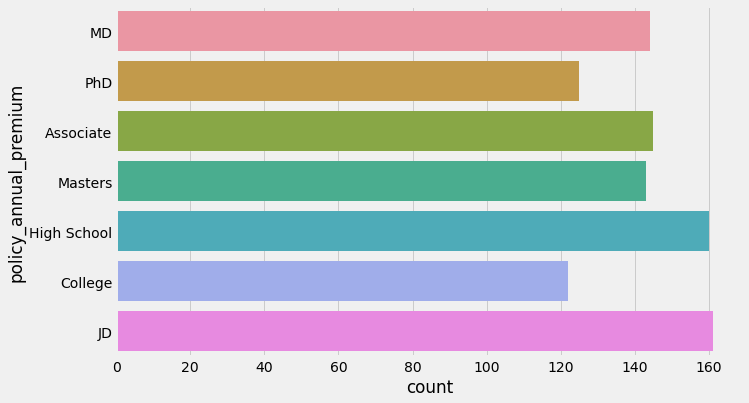

In [20]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=Insurance_Fraud_Detection) 
ax.set_ylabel('policy_annual_premium')
plt.show()


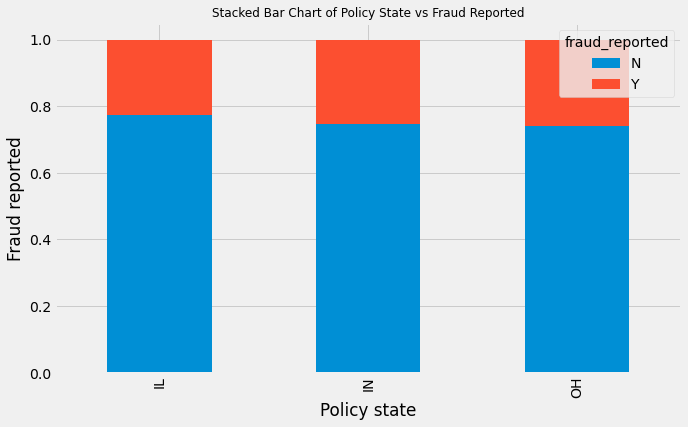

In [22]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(Insurance_Fraud_Detection.policy_state, Insurance_Fraud_Detection.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()

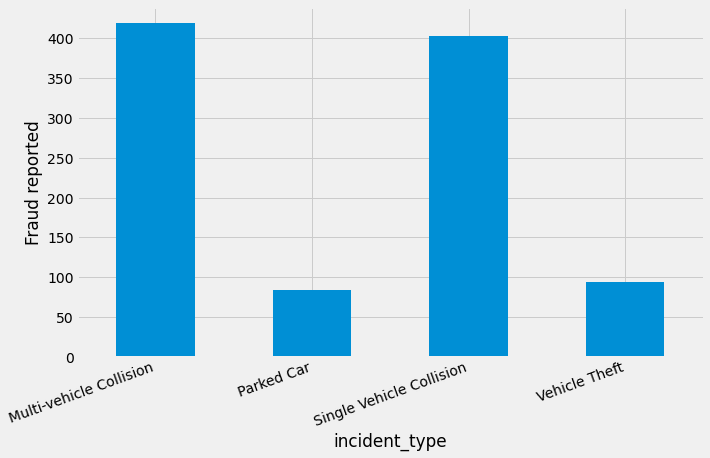

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Insurance_Fraud_Detection.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

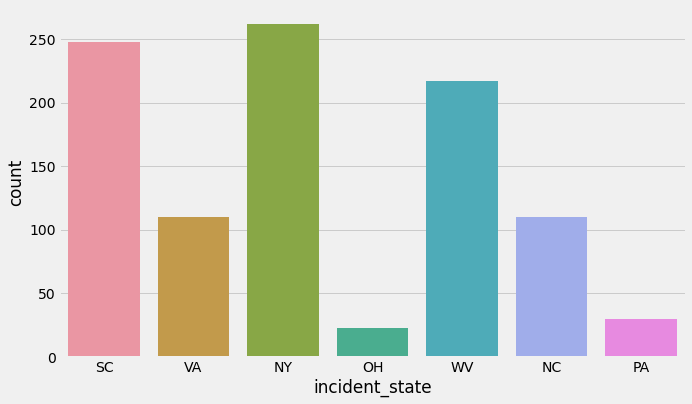

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=Insurance_Fraud_Detection)

Text(0, 0.5, 'Fraud reported')

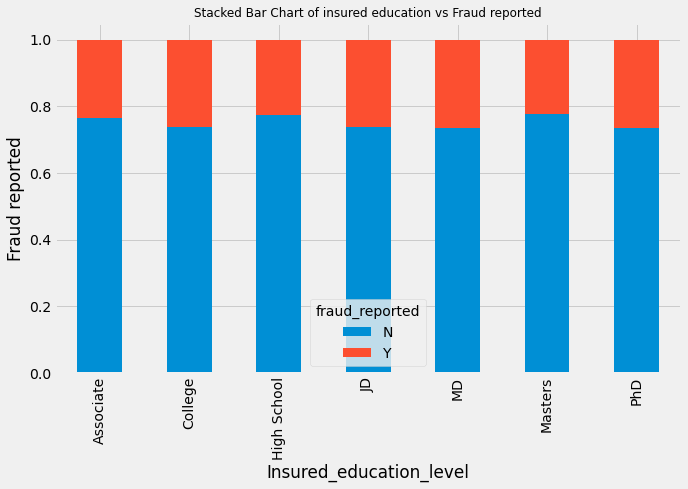

In [25]:
plt.rcParams['figure.figsize'] = [10, 6]
table=pd.crosstab(Insurance_Fraud_Detection.insured_education_level, Insurance_Fraud_Detection.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured_education_level')
plt.ylabel('Fraud reported')

In [29]:
Insurance_Fraud_Detection['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
Insurance_Fraud_Detection['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

Insurance_Fraud_Detection.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [27]:
Insurance_Fraud_Detection[['insured_zip']] = Insurance_Fraud_Detection[['insured_zip']].astype(object)
Insurance_Fraud_Detection.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


In [30]:
Insurance_Fraud_Detection.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.0,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,995.0,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN,NaN
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,477695.0,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,2.0,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000,NaN


In [35]:
Insurance_Fraud_Detection['csl_per_person'] = Insurance_Fraud_Detection.policy_csl.str.split('/', expand=True)[0]
Insurance_Fraud_Detection['csl_per_accident'] = Insurance_Fraud_Detection.policy_csl.str.split('/', expand=True)[1]

In [36]:
Insurance_Fraud_Detection['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [38]:
Insurance_Fraud_Detection['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [39]:
Insurance_Fraud_Detection.auto_year.value_counts() 

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [42]:
Insurance_Fraud_Detection['vehicle_age'] = 2018 - Insurance_Fraud_Detection['auto_year'] 
Insurance_Fraud_Detection['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [43]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24] 
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
Insurance_Fraud_Detection['incident_period_of_day'] = pd.cut(Insurance_Fraud_Detection.incident_hour_of_the_day, bins, labels=names).astype(object)
Insurance_Fraud_Detection[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [44]:
Insurance_Fraud_Detection.select_dtypes(include=['object']).columns 

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [45]:
Insurance_Fraud_Detection = Insurance_Fraud_Detection.drop(columns = [
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

Insurance_Fraud_Detection.head(2)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age,incident_period_of_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,1,250,500,14,early_morning
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,1,250,500,11,morning


In [47]:
unknowns = {}
for i in list(Insurance_Fraud_Detection.columns):
    if (Insurance_Fraud_Detection[i]).dtype == object:
        j = np.sum(Insurance_Fraud_Detection[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
csl_per_person             0
csl_per_accident           0
incident_period_of_day     0


In [48]:
Insurance_Fraud_Detection.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

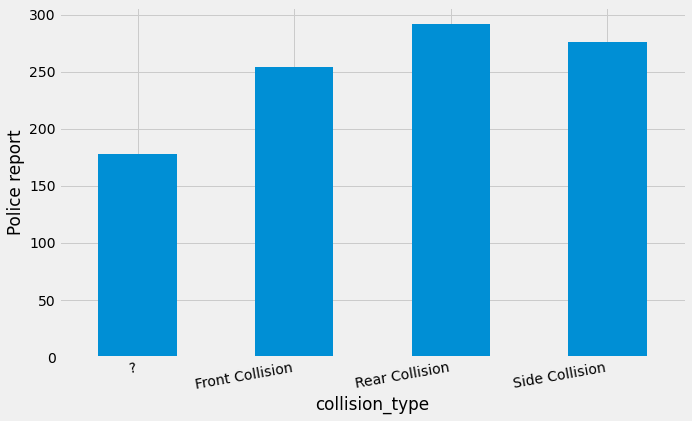

In [50]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= Insurance_Fraud_Detection.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [53]:
Insurance_Fraud_Detection.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [54]:
Insurance_Fraud_Detection.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'csl_per_person', 'csl_per_accident',
       'vehicle_age', 'incident_period_of_day'],
      dtype='object')

In [55]:
Insurance_Fraud_Detection._get_numeric_data().head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1,14
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1,11
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0,11
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1,4
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0,9


In [56]:
dummies = pd.get_dummies(Insurance_Fraud_Detection[[
    'policy_state', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model', 
    'csl_per_person', 
    'csl_per_accident',
    'incident_period_of_day']])

dummies = dummies.join(Insurance_Fraud_Detection[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,YES,YES,1
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [57]:
X = dummies.iloc[:, 0:-1] 
y = dummies.iloc[:, -1]  

In [58]:
len(X.columns)


148

In [59]:
X.head(2)


,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,YES,YES
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [60]:

y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [62]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10) 

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [63]:
X = X.drop(columns = ['collision_type'])
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [65]:
X = pd.concat([X, Insurance_Fraud_Detection._get_numeric_data()], axis=1)
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0

In [66]:
X = X.drop(columns = ['fraud_reported'])
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=163)

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.841


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 


rfc = RandomForestClassifier(n_estimators=200)
    
kfold = KFold(n_splits=5)
result2 = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.7775000000000001
